In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/placement.csv")

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.shape

(100, 4)

In [ ]:
# steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/ model Selection
# 6. Deploy the model


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [9]:
df = df.iloc[:,1:]

In [10]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [11]:
import matplotlib.pyplot as plt

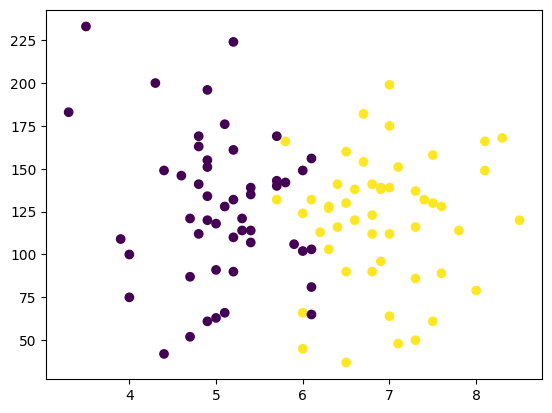

In [13]:
plt.scatter(df["cgpa"],df["iq"], c=df["placement"])

In [14]:
x = df.iloc[:,0:2] # this is independent feature of dataset
y = df.iloc[:,-1]  # this is dependent feature of dataset

In [17]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [20]:
x.shape

(100, 2)

In [ ]:
# Train test split

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.1)

In [23]:
x_train

,cgpa,iq
65,8.1,166.0
54,6.4,141.0
83,7.5,130.0
38,6.5,160.0
10,6.0,45.0
...,...,...
80,4.9,196.0
93,6.8,112.0
68,4.0,75.0
67,5.0,118.0


In [24]:
y_train

65    1
54    1
83    1
38    1
10    1
     ..
80    0
93    1
68    0
67    0
98    1
Name: placement, Length: 90, dtype: int64

In [25]:
x_test

,cgpa,iq
75,4.8,169.0
2,5.3,121.0
70,6.3,127.0
42,7.6,89.0
33,6.0,149.0
6,5.7,143.0
90,7.3,86.0
28,5.2,90.0
1,5.9,106.0
23,4.7,87.0


In [ ]:
# scale Value means converting all the input values between -1 to 1 so that it would be easy to ploting the graph

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
x_train = scaler.fit_transform(x_train)

In [29]:
x_train

array([[ 1.80982654,  1.02233271],
       [ 0.34239962,  0.40876947],
       [ 1.29191115,  0.13880164],
       [ 0.42871885,  0.87507753],
       [-0.00287731, -1.94731339],
       [-1.72926192, -0.59747425],
       [ 1.80982654,  0.60510971],
       [-0.261835  ,  0.38422694],
       [-1.12502731, -1.77551568],
       [ 0.94663423,  0.65419477],
       [-1.383985  ,  0.60510971],
       [-0.69343115, -0.35204896],
       [ 0.51503808, -0.10662366],
       [ 1.20559192,  0.1878867 ],
       [ 0.77399577, -0.69564437],
       [ 1.37823039,  0.08971658],
       [-0.261835  ,  0.1878867 ],
       [-1.81558116, -0.37659149],
       [ 0.860315  ,  1.8322362 ],
       [-0.60711192, -0.25387884],
       [-1.47030423,  1.85677873],
       [-0.95238885, -0.10662366],
       [ 0.42871885, -2.14365363],
       [ 0.860315  , -0.3029639 ],
       [ 1.11927269, -0.20479378],
       [ 0.42871885, -0.84289955],
       [-0.69343115,  0.89962006],
       [-1.03870808, -0.3029639 ],
       [ 0.08344192,

In [30]:
x_test = scaler.transform(x_test)

In [31]:
x_test

array([[-1.03870808,  1.0959603 ],
       [-0.60711192, -0.08208113],
       [ 0.25608038,  0.06517405],
       [ 1.37823039, -0.86744208],
       [-0.00287731,  0.60510971],
       [-0.261835  ,  0.45785453],
       [ 1.11927269, -0.94106967],
       [-0.69343115, -0.84289955],
       [-0.08919654, -0.45021907],
       [-1.12502731, -0.91652714]])

In [ ]:
# Train model

In [33]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf = LogisticRegression()

In [45]:
clf.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# model evaluating

In [50]:
y_predict = clf.predict(x_test)

In [47]:
y_test

75    0
2     0
70    1
42    1
33    0
6     0
90    1
28    0
1     0
23    0
Name: placement, dtype: int64

In [48]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, y_predict)

0.9

In [52]:
# decision boundary
from mlxtend.plotting import plot_decision_regions

<Axes: >

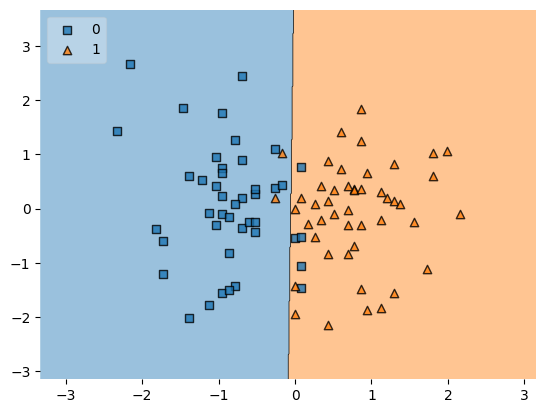

In [53]:
plot_decision_regions(x_train, y_train.values , clf = clf, legend = 2)

In [ ]:
# Now deploying the ML model to a website

In [54]:
import pickle

In [55]:
pickle.dump(clf, open("model.pkl","wb"))